# Filtros 
Vemos primero 

Pres1_Filtros2021 y 

Pres2_Filtros_Lineales

## Librerías necesarias

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal

##

## Filtros lineales: Convolución - Correlación 
- Mejora en el dominio espacial, suavizado (filtros pasa bajo)
- Realce o detección de bordes (filtros pasa alto)

### Filtro lineales de suavizado : 

#### Ej 1 a) 
Genere una imagen con 6 nieles de gris. (Banda)


float64


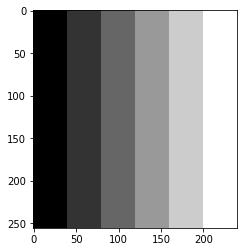

In [4]:
A= np.ones((256, 240))
A[:, 0:40]=0
A[:, 40:80]=0.2
A[:, (2*40):(3*40)]=0.4
A[:, (3*40):(4*40)]=0.6
A[:, (4*40):(5*40)]=0.8
print(A.dtype)
plt.imshow(A, cmap='gray')
plt.show()

Filtramos la imagen con una máscara o kernel (correlación o convolución con máscara/kernel)

Se necesitan dos matrices: 

- Imagen
- kernel o máscara

Ahora generemos la máscara o kernel para promediado

In [5]:
#Definimos una función para generar una máscara o kernel cuadrado para promedio (suavisado)
def kernel_prom(n):
    return(np.ones((n,n),np.float32)/(n**2))

In [6]:
# genero la máscara o kernel
n=5 #lo ideal y usual es n impar
kernel=kernel_prom(n) 
print(kernel)
print('Notar que la suma de sus elementos da:', np.sum(kernel))

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Notar que la suma de sus elementos da: 1.0


La función **cv2.filter2D** :

- calcula la correlación (la correlación es análoga a convolución pero sin rotar la máscara. Cuando la máscara (kernel) es "bi-simétrica" convolución y correlación coinciden)

- el resultado tiene el mismo tamaño que la imagen entrante (la función recorta la correlación para lograr esto)

- ddepth , asociado al tipo de datos (depth) del resultado 	(-1, para igual tipo de datos que la entrada)

- anchor indica la posición del pivote del kernel; default:(-1,-1) lugar central.

In [7]:
#podemos cambiar la imagen de bandas (float64) por otra de tipo uint8
#A=cv2.imread('Ortopantomografia.jpg',0) #abrimos imagen monocroma
#print(I.dtype)

Tamaño original: (256, 240) Tamaño filtrada: (256, 240)
Tipo original: float64 Tamaño filtrada: float64
0.0 0.0


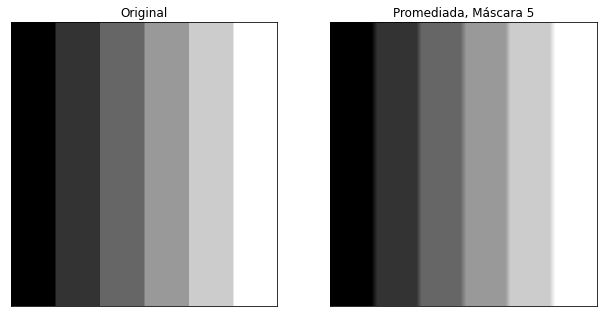

In [8]:
# Hacemos la correlación:
A_suav = cv2.filter2D(A,-1,kernel) #El -1 (ddepth) indica que la salida será del mismo tipo que A
print('Tamaño original:',A.shape, 'Tamaño filtrada:', A_suav.shape)
print('Tipo original:',A.dtype, 'Tamaño filtrada:', A_suav.dtype)
print(A[20,20],A_suav[20,20])
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)# para fijar el tamaño de la imagen

plt.subplot(121),plt.imshow(A,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.subplot(122),plt.imshow(A_suav,cmap='gray'),plt.title('Promediada, Máscara %d' %(n))
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.show()

Filtrado con kernel Gaussiano, 2 en 1: **cv2.GaussianBlur**

In [9]:
A_gauss = cv2.GaussianBlur(A,(5,5),0) # 2 en 1: genera el kernel Gaussiano nxn y realiza el filtrado
print('Tamaño original:',A.shape, 'Tamaño filtrada:', A_gauss.shape)
print('Tipo original:',A.dtype, 'Tamaño filtrada:', A_gauss.dtype)
print(A[20,20],A_gauss[20,20])

Tamaño original: (256, 240) Tamaño filtrada: (256, 240)
Tipo original: float64 Tamaño filtrada: float64
0.0 0.0


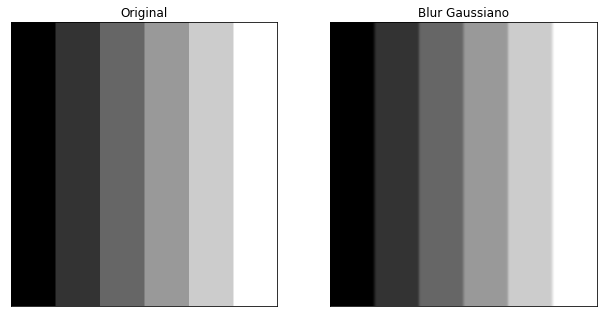

In [10]:
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)# para fijar el tamaño de la imagen

plt.subplot(121),plt.imshow(A,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) #para que no escriba la escala

plt.subplot(122),plt.imshow(A_gauss,cmap='gray'),plt.title('Blur Gaussiano') 
plt.xticks([]), plt.yticks([]) #para que no escriba la escala

plt.show()

Comparamos visualmente imagen original y los 2 suavizados


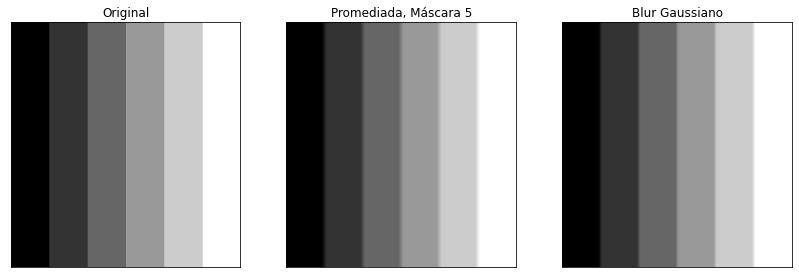

In [11]:
fig = plt.gcf()
fig.set_size_inches(14, 10)# para fijar el tamaño de la imagen

plt.subplot(131),plt.imshow(A,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.subplot(132),plt.imshow(A_suav,cmap='gray'),plt.title('Promediada, Máscara %d' %(n))
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.subplot(133),plt.imshow(A_gauss,cmap='gray'),plt.title('Blur Gaussiano') 
plt.xticks([]), plt.yticks([]) #para que no escriba la escala
plt.show()

### Filtro lineales para bordes : 


Seguimos con los filtros lineales en el dominio del espacio 

Vemos antes Pres3_Filtros_Bordes_Lineales


Para encontrar bordes/cambios: se usa máscaras de diferencia: Prewit por ej.


In [12]:
#máscara/kernel Prewitt 3x3: 
#Para Bordes Diagonales
KPD=np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]])
print(KPD)
print('Notar que la suma de los coeficientes da: ', np.sum(KPD))

[[ 1  1  0]
 [ 1  0 -1]
 [ 0 -1 -1]]
Notar que la suma de los coeficientes da:  0


In [13]:
#Para bordes Verticales:
KPV=   np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
print(KPV)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [14]:
#Para Bordes Horizontales
KPH= np.transpose(KPV)    
print(KPH)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


In [16]:
I=cv2.imread('pics/Ortopantomografia.jpg',0) #abrimos imagen monocroma
print(I.dtype)

uint8


In [17]:
#I=I.astype(float)
#print(I.dtype, I[20,20])

uint8 3
uint8 0
uint8 3


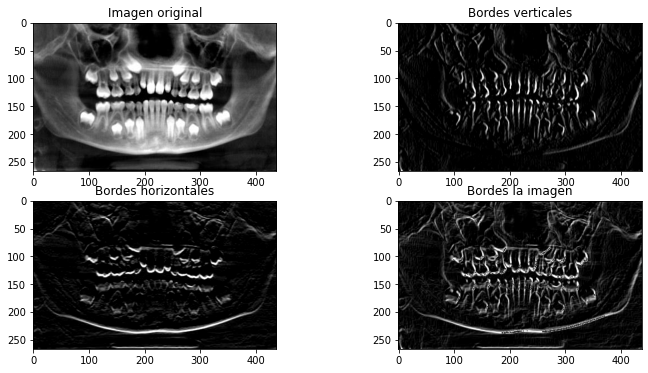

notar la importancia del tipo de datos en este caso


In [18]:
OP_v=cv2.filter2D(I, -1, KPV  )   # Busca bordes verticales de la imagen.
OP_h=cv2.filter2D(I, -1,  KPH  )    #Bordes horizontales de la imagen
print(OP_v.dtype,OP_v[20,20])
print(OP_h.dtype,OP_h[20,20])

Bordes= OP_v+OP_h  

print(Bordes.dtype,Bordes[20,20])

fig = plt.gcf()
fig.set_size_inches(12,6)
plt.subplot(221),plt.imshow(I,cmap='gray'),plt.title('Imagen original')
plt.subplot(222),plt.imshow(OP_v,cmap='gray'),plt.title('Bordes verticales')
plt.subplot(223),plt.imshow(OP_h,cmap='gray'),plt.title('Bordes horizontales')
plt.subplot(224),plt.imshow(Bordes,cmap='gray'),plt.title('Bordes la imagen')
#plt.colorbar()
plt.show()
print('notar la importancia del tipo de datos en este caso')

Hay otro tipo de máscaras/kernel para bordes:
- Sobel 3x3, 5x5, etc.
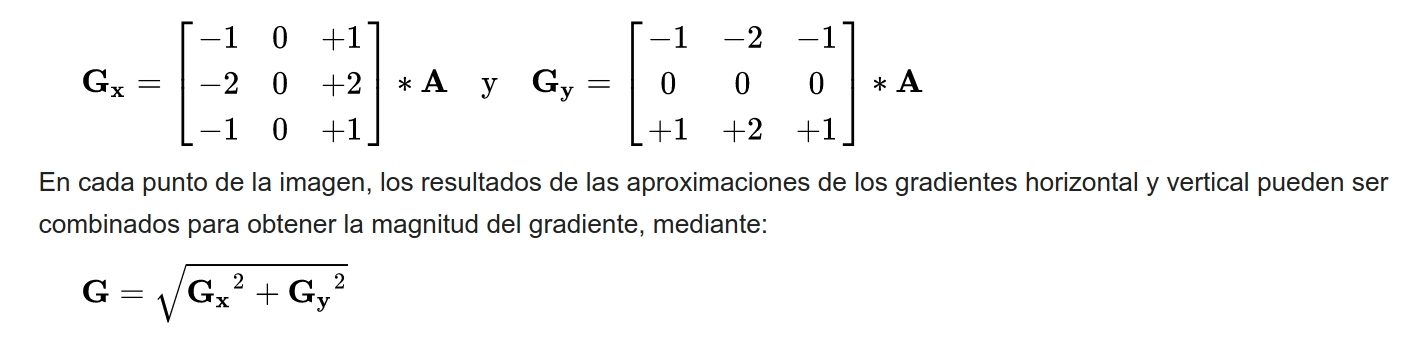

**Otro para detección de bordes, detalles: Laplaciano**

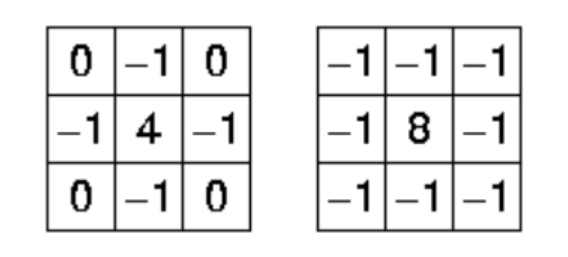


**Notamos que siempre las máscaras (kernels) de diferencia, la suma de sus coeficientes es 0**

**Esta característica deviene en una imagen filtrada con zonas oscuras (cercanas a 0) en donde la original tenía valores homogéneos (de intensidad pareja o casi constante)**

Observamos la siguiente máscara o kernel. Resalta bordes, detalles, cambios.


In [19]:
HI=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # Kernel de filtro pasa alto, para resaltar bordes, detalles, cambios rápidos
print(HI)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


Apliquemos dicho filtro


uint8 uint8


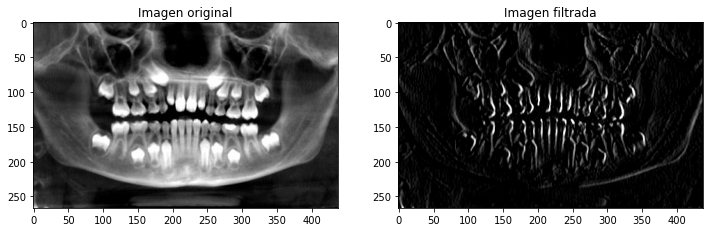

In [20]:
I_filt=cv2.filter2D(I, -1, KPV  )   #filtramos la imagen
print(I.dtype,I_filt.dtype) #miramos su tipo


fig = plt.gcf()
fig.set_size_inches(12,6)#
plt.subplot(121),plt.imshow(I,cmap='gray'),plt.title('Imagen original')
plt.subplot(122),plt.imshow(I_filt,cmap='gray'),plt.title('Imagen filtrada')

#plt.colorbar()
plt.show()


### Filtros no lineales
Por ejemplo, filtros de orden:
- Máximo
- Mínimo
- Mediana

Vemos antes Pres4_Filtros_Orden_no_lineales

- Filtro de la mediana: reemplaza los valores del bloque por su mediana (valor que deja igual cantidad de valores de intensidad superiores, como inferiores).

- Filtro del mínimo: reemplaza los valores del bloque por el mínimo (permite hallar los puntos oscuros). Elimina el ruido sal.

- Filtro del máximo: reemplaza los valores del bloque por el máximo (permite hallar los puntos brillantes). Elimina el ruido pimienta.

- Filtro de orden n: reemplaza los valores del bloque por el valor de orden n del vector formado por los elementos ordenados del bloque

- Filtro de moda: toma el valor que más se repite en el bloque en estudio. (Tiene más sentido cuando los pixeles son categóricos, parece no estar implementado en python)

Notar que son medidas estadísticas

### Filtro de la Mediana

Filtro con efecto de suavisado. Reemplaza todos los valores de intensidad de un bloque por el valor de la mediana.

Ventaja: Elimina los valores muy alejados (tipo sal y pimienta), no se ve afectado por datos atípicos

La función que lo hace es cv2.medianBlur


In [21]:
import cv2
import matplotlib.pyplot as plt

I_RGB = cv2.imread('pics/lenna.jpg')    # numpy-array of shape (N, M); dtype=np.uint8
I = cv2.cvtColor(I_RGB,cv2.COLOR_BGR2GRAY) #Convierte la RGB a escala de grises. Podemos obtenerla asi o poniendo 0 en cv2.imread

#I= cv2.cvtColor(I_RGB,cv2.COLOR_BGR2RGB) esto por si queremos filtrar con mediana la RGB 

#Filtro de la mediana

n= int(input('Ingrese el tamaño de la máscara (n): '))

I_med = cv2.medianBlur(I,n)

print('Tamaño original:',I.shape, 'Tamaño filtrada:', I_med.shape)
print('Tipo original:',I.dtype, 'Tamaño filtrada:', I_med.dtype)
print(I[50,20],I_med[50,20])


Ingrese el tamaño de la máscara (n): 5
Tamaño original: (512, 512) Tamaño filtrada: (512, 512)
Tipo original: uint8 Tamaño filtrada: uint8
107 107


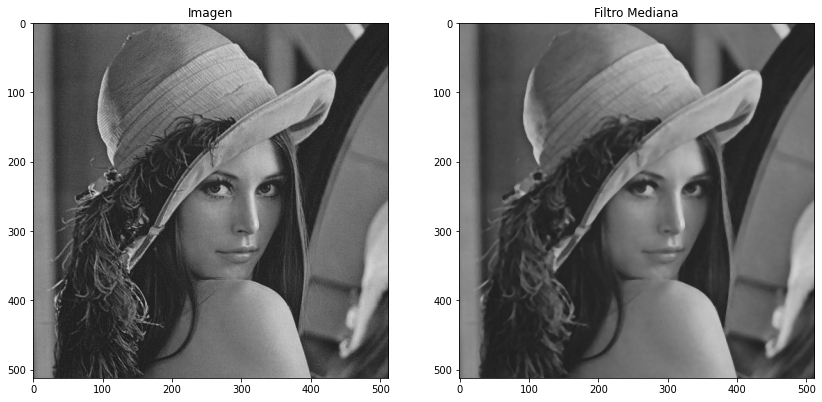

In [22]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.subplot(121),plt.imshow(I,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')
plt.subplot(122),plt.imshow(I_med,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')

plt.show()
#Para ver el efecto agregarle ruido salt & pepper

Para filtros de minimo (cv2.erode)  y de máximo (cv2.dilate). Tenemos que darle el kernel.

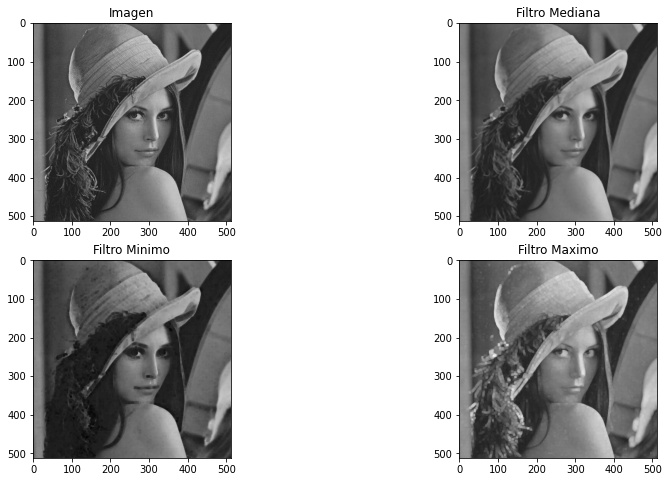

In [23]:
kernel = np.ones((n,n), np.uint8)
I_min=cv2.erode(I,kernel,iterations=1)#filtro de minimo
I_max=cv2.dilate(I,kernel,iterations=1)#filtro de maximo
#mostramos todo
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.subplot(221),plt.imshow(I,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')
plt.subplot(222),plt.imshow(I_med,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')
plt.subplot(223),plt.imshow(I_min,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Minimo')
plt.subplot(224),plt.imshow(I_max,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Maximo')
plt.show()

En la proxima Ntbk, agregamos ruido y filtramos


Ahora agregamos "ruido aleatorio aditivo"a una imagen. 
Estos ruidos responden a un modelo de tipo:

Im_distorsionada=Im_orig + Ruido aleatorio

No podemos "restar" el ruido para recuperar la Im Original porque es aleatorio!!! No lo conocemos!!!

Ciertos ruidos se clasifican por su "distribución"


